<a href="https://colab.research.google.com/github/INA-95/online_used_stuff_market_analysis/blob/main/online_fashion_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount

from google.colab import drive
drive.mount('/drive')
%cd /drive/MyDrive/Side_Project/side_project/Online_Fashion_Platform_BI_Project

Mounted at /drive
/drive/MyDrive/Side_Project/side_project/Online_Fashion_Platform_BI_Project


In [2]:
# library

import os
from glob import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# import data

path = glob("*.csv")
df = pd.read_csv(path[0])
df.head()

,t_date,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes,Return
0,2022-04-20,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",1
1,2023-09-03,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",1
2,2023-01-07,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",0
3,2021-03-19,14709966,Nayo Women Red Floral Printed Kurta With Trous...,"Kurta, Trouser, Dupatta",3699,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",0
4,2023-08-08,11056154,AHIKA Women Black & Green Printed Straight Kurta,Kurta,1350,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   t_date        14214 non-null  object 
 1   p_id          14214 non-null  int64  
 2   name          14214 non-null  object 
 3   products      14214 non-null  object 
 4   price         14214 non-null  int64  
 5   colour        14214 non-null  object 
 6   brand         14214 non-null  object 
 7   img           14214 non-null  object 
 8   ratingCount   6530 non-null   float64
 9   avg_rating    6530 non-null   float64
 10  description   14214 non-null  object 
 11  p_attributes  14214 non-null  object 
 12  Return        14214 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 1.4+ MB


### Best selling product

In [5]:
def most_selling(col:str) -> pd.DataFrame :
    cnt_of_prd = df.groupby(col)[col].count().rename_axis('product_name').reset_index(name = 'count')
    most_selling_prd = cnt_of_prd.sort_values(by = 'count', ascending = False)
    return most_selling_prd

In [6]:
most_selling_prd = most_selling('products').reset_index(drop = True)[:10]
most_selling_prd

,product_name,count
0,Jeans,941
1,Dupatta,870
2,Saree,857
3,Top,805
4,Trousers,762
5,"Lehenga, Blouse, Dupatta",693
6,Jacket,688
7,Jumpsuit,633
8,Dress Material,624
9,Skirt,484


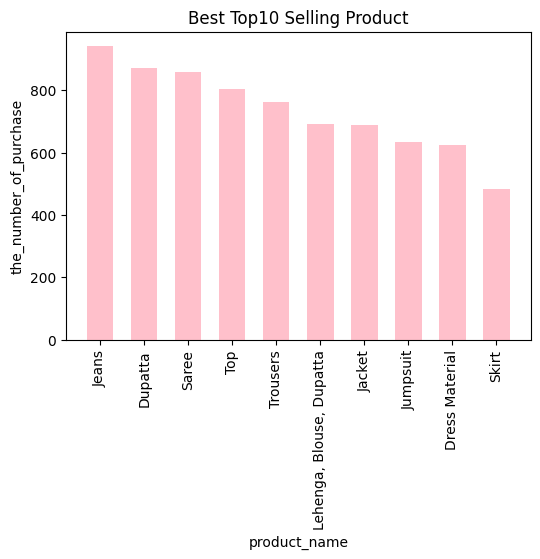

In [18]:
x_val = [x for x in most_selling_prd['product_name']]
y_val = [y for y in most_selling_prd['count']]

fig = plt.figure(figsize = (6, 4))
plt.bar(x_val, y_val, color = 'pink', width = 0.6)
plt.xticks(rotation = 90)
plt.xlabel('product_name')
plt.ylabel('the_number_of_purchase')
plt.title('Best Top10 Selling Product')
plt.show()


### Return Rate

In [36]:
def most_return(col:str) -> pd.DataFrame :
    return_prd = df.groupby(col)['Return'].sum().rename_axis('product_name').reset_index(name = 'num_of_return')
    most_return_prd = return_prd.sort_values(by = 'num_of_return', ascending = False)
    return most_return_prd

In [37]:
most_return('products')

,product_name,num_of_return
285,Jeans,473
580,Saree,447
200,Dupatta,437
844,Trousers,388
749,Top,363
...,...,...
668,"Skirt, Midi Skirt, Pencil Skirt, Floral Printe...",0
505,"Nursing & Feeding, Pure Cotton, Top",0
507,Nursing Tops,0
205,Dupattas,0


In [38]:
df1 = most_selling('products')
df2 = most_return('products')
df3 = pd.merge(df1, df2, on = 'product_name', how = 'inner')

df3.head()

,product_name,count,num_of_return
0,Jeans,941,473
1,Dupatta,870,437
2,Saree,857,447
3,Top,805,363
4,Trousers,762,388


In [39]:
return_rate = (df3['num_of_return'] / df3['count']) * 100
df3['return_rate'] = return_rate
df3.head()

,product_name,count,num_of_return,return_rate
0,Jeans,941,473,50.265675
1,Dupatta,870,437,50.229885
2,Saree,857,447,52.158693
3,Top,805,363,45.093168
4,Trousers,762,388,50.918635


In [40]:
df3 = df3.sort_values(by = 'return_rate', ascending = False)
df3.head()

,product_name,count,num_of_return,return_rate
909,trousers,1,1,100.0
269,Black Conversational Vacay Attire,2,2,100.0
293,"Lehenga, Choli Set",2,2,100.0
594,Cropped Parallel Trousers,1,1,100.0
596,"Cropped Top, Skirt",1,1,100.0


<Axes: >

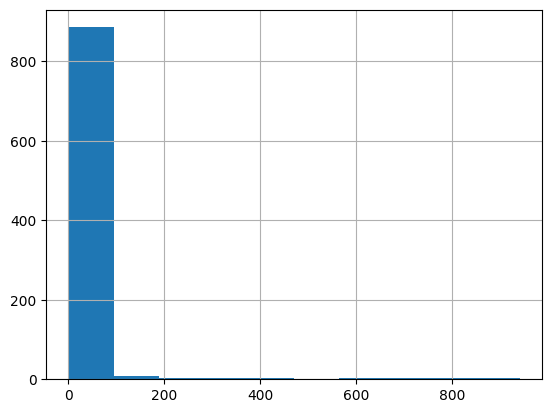

In [41]:
df3['count'].hist()

In [42]:
df3 = df3[df3['count']>100]
df3 = df3.sort_values(by = 'return_rate', ascending = False)

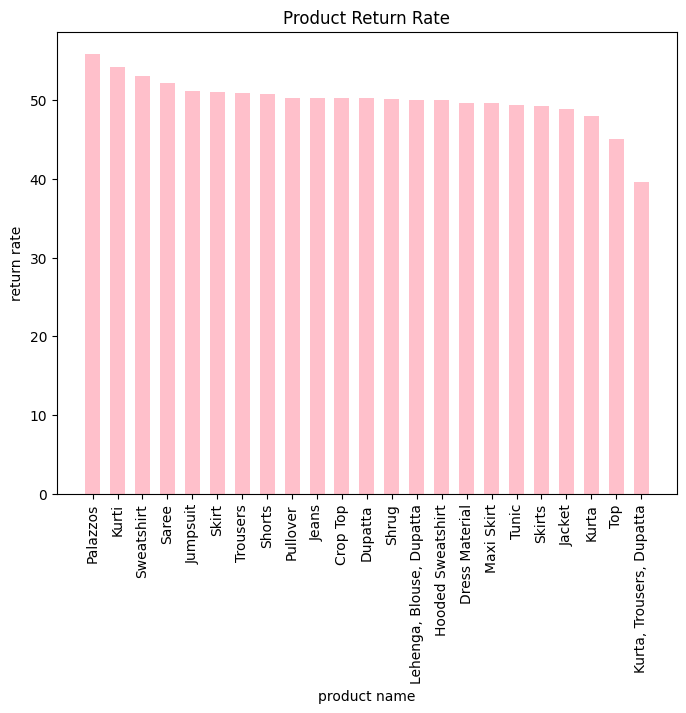

In [43]:
fig = plt.figure(figsize = (8, 6))

x_vals = [x for x in df3['product_name']]
y_vals = [y for y in df3['return_rate']]
plt.bar(x_vals, y_vals, width = 0.6, color = 'pink')
plt.xticks(rotation = 90)
plt.xlabel('product name')
plt.ylabel('return rate')
plt.title('Product Return Rate')
plt.show()

### Product Purchase Trend

#### yearly/monthly purchase trend : sum


In [44]:
df['t_date'] = pd.to_datetime(df['t_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   t_date        14214 non-null  datetime64[ns]
 1   p_id          14214 non-null  int64         
 2   name          14214 non-null  object        
 3   products      14214 non-null  object        
 4   price         14214 non-null  int64         
 5   colour        14214 non-null  object        
 6   brand         14214 non-null  object        
 7   img           14214 non-null  object        
 8   ratingCount   6530 non-null   float64       
 9   avg_rating    6530 non-null   float64       
 10  description   14214 non-null  object        
 11  p_attributes  14214 non-null  object        
 12  Return        14214 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.4+ MB


In [45]:
df['year'] = df['t_date'].dt.year
df['month'] = df['t_date'].dt.month
df['day'] = df['t_date'].dt.day

In [47]:
year_month_prd = df.groupby(['year', 'month', 'products'])['products'].count().to_frame()
year_month_prd.head()

products
year month products                
2021 1     A-Line Skirt           1
           A-Line Top             2
           Anarkali Kurta         1
           Biker Shorts           2
           Blazers                1

In [50]:
year_month_prd = year_month_prd.rename(columns = {'products':'num_of_purchase'})
year_month_prd = year_month_prd.reset_index()

In [66]:
# purchase trend(yearly/monthly) : sum

def purchase_trend_sum(period:str) -> pd.DataFrame :
    purchase_trend_sum = year_month_prd.groupby(['products', period])['num_of_purchase'].sum().reset_index()
    return purchase_trend_sum

def top_n_prd_within_period(period:str, n:int):
    res= purchase_trend.groupby(period).apply(lambda x : x.nlargest(n, ['num_of_purchase']))
    res.reset_index(drop = True)
    return res

In [102]:
purchase_trend = purchase_trend_sum('year')
top_n_prd_within_period('year', 5)

products  year  num_of_purchase
year                                      
2021 428      Jeans  2021              322
     890      Saree  2021              276
     313    Dupatta  2021              272
     1152       Top  2021              259
     387     Jacket  2021              239
2022 314    Dupatta  2022              304
     429      Jeans  2022              292
     1282  Trousers  2022              283
     891      Saree  2022              281
     1153       Top  2022              272
2023 430      Jeans  2023              327
     892      Saree  2023              300
     315    Dupatta  2023              294
     1154       Top  2023              274
     1283  Trousers  2023              255

In [105]:
purchase_trend = purchase_trend_sum('month')
top_n_prd_within_period('month', 5)

products  month  num_of_purchase
month                                                       
1     1595                     Saree      1               80
      757                      Jeans      1               71
      581                    Dupatta      1               64
      849                   Jumpsuit      1               64
      2037                       Top      1               62
2     758                      Jeans      2               78
      582                    Dupatta      2               71
      2038                       Top      2               62
      699                     Jacket      2               55
      1596                     Saree      2               53
3     759                      Jeans      3               87
      1219  Lehenga, Blouse, Dupatta      3               79
      1597                     Saree      3               73
      2039                       Top      3               73
      2233                  Trousers      3               69
4     584                    Dupatta      4               76
      760                      Jeans      4               74
      1598                     Saree      4               73
      2040                       Top      4               68
      701                     Jacket      4               67
5     585                    Dupatta      5               80
      1599                     Saree      5               77
      2041                       Top      5               74
      2235                  Trousers      5               71
      761                      Jeans      5               68
6     762                      Jeans      6               87
      2042                       Top      6               74
      586                    Dupatta      6               67
      1600                     Saree      6               64
      854                   Jumpsuit      6               63
7     587                    Dupatta      7               77
      763                      Jeans      7               67
      2237                  Trousers      7               66
      704                     Jacket      7               58
      1601                     Saree      7               58
8     764                      Jeans      8               83
      2238                  Trousers      8               82
      588                    Dupatta      8               79
      1602                     Saree      8               76
      2044                       Top      8               65
9     765                      Jeans      9               85
      2045                       Top      9               80
      589                    Dupatta      9               78
      1603                     Saree      9               71
      2239                  Trousers      9               58
10    766                      Jeans     10               87
      1604                     Saree     10               79
      2240                  Trousers     10               74
      2046                       Top     10               70
      707                     Jacket     10               65
11    767                      Jeans     11               80
      1605                     Saree     11               72
      2047                       Top     11               69
      591                    Dupatta     11               68
      2241                  Trousers     11               64
12    1606                     Saree     12               81
      592                    Dupatta     12               78
      768                      Jeans     12               74
      1228  Lehenga, Blouse, Dupatta     12               70
      709                     Jacket     12               60

#### yearly/monthly purchase trend : mean


In [69]:
# purchase trend(yearly/monthly) : mean

def purchase_trend_mean(period:str):
    purchase_trend_mean = year_month_prd.groupby(['products', period])['num_of_purchase'].mean().reset_index()
    return purchase_trend_mean

def top_n_mean_within_period(period:str, n:int):
    res = purchase_trend.groupby(period).apply(lambda x : x.nlargest(n, ['num_of_purchase']))
    res.reset_index(drop = True)
    return res

In [103]:
purchase_trend = purchase_trend_mean('year')
top_n_mean_within_period('year', 5)

products  year  num_of_purchase
year                                      
2021 428      Jeans  2021        26.833333
     890      Saree  2021        23.000000
     313    Dupatta  2021        22.666667
     1152       Top  2021        21.583333
     387     Jacket  2021        19.916667
2022 314    Dupatta  2022        25.333333
     429      Jeans  2022        24.333333
     1282  Trousers  2022        23.583333
     891      Saree  2022        23.416667
     1153       Top  2022        22.666667
2023 430      Jeans  2023        27.250000
     892      Saree  2023        25.000000
     315    Dupatta  2023        24.500000
     1154       Top  2023        22.833333
     1283  Trousers  2023        21.250000

In [106]:
purchase_trend = purchase_trend_mean('month')
top_n_mean_within_period('month', 5)

products  month  num_of_purchase
month                                                       
1     1595                     Saree      1        26.666667
      757                      Jeans      1        23.666667
      581                    Dupatta      1        21.333333
      849                   Jumpsuit      1        21.333333
      2037                       Top      1        20.666667
2     758                      Jeans      2        26.000000
      582                    Dupatta      2        23.666667
      2038                       Top      2        20.666667
      699                     Jacket      2        18.333333
      1596                     Saree      2        17.666667
3     759                      Jeans      3        29.000000
      1219  Lehenga, Blouse, Dupatta      3        26.333333
      1597                     Saree      3        24.333333
      2039                       Top      3        24.333333
      2233                  Trousers      3        23.000000
4     584                    Dupatta      4        25.333333
      760                      Jeans      4        24.666667
      1598                     Saree      4        24.333333
      2040                       Top      4        22.666667
      701                     Jacket      4        22.333333
5     585                    Dupatta      5        26.666667
      1599                     Saree      5        25.666667
      2041                       Top      5        24.666667
      2235                  Trousers      5        23.666667
      761                      Jeans      5        22.666667
6     762                      Jeans      6        29.000000
      2042                       Top      6        24.666667
      586                    Dupatta      6        22.333333
      1600                     Saree      6        21.333333
      854                   Jumpsuit      6        21.000000
7     587                    Dupatta      7        25.666667
      763                      Jeans      7        22.333333
      2237                  Trousers      7        22.000000
      704                     Jacket      7        19.333333
      1601                     Saree      7        19.333333
8     764                      Jeans      8        27.666667
      2238                  Trousers      8        27.333333
      588                    Dupatta      8        26.333333
      1602                     Saree      8        25.333333
      2044                       Top      8        21.666667
9     765                      Jeans      9        28.333333
      2045                       Top      9        26.666667
      589                    Dupatta      9        26.000000
      1603                     Saree      9        23.666667
      2239                  Trousers      9        19.333333
10    766                      Jeans     10        29.000000
      1604                     Saree     10        26.333333
      2240                  Trousers     10        24.666667
      2046                       Top     10        23.333333
      707                     Jacket     10        21.666667
11    767                      Jeans     11        26.666667
      1605                     Saree     11        24.000000
      2047                       Top     11        23.000000
      591                    Dupatta     11        22.666667
      2241                  Trousers     11        21.333333
12    1606                     Saree     12        27.000000
      592                    Dupatta     12        26.000000
      768                      Jeans     12        24.666667
      1228  Lehenga, Blouse, Dupatta     12        23.333333
      709                     Jacket     12        20.000000

#### Yearly Purchase Mean VS Overall Yearly Purchase Mean


In [100]:
overall_yearly_purchase_mean = year_month_prd.groupby('year')['num_of_purchase'].mean().reset_index().rename(columns = {'num_of_purchase' : 'mean'})
overall_monthly_purchase_mean = year_month_prd.groupby('month')['num_of_purchase'].mean().reset_index().rename(columns = {'num_of_purchase' : 'mean'})

In [107]:
overall_yearly_purchase_mean

,year,mean
0,2021,3.881568
1,2022,3.877518
2,2023,3.923967


In [108]:
# join table : yearly purchase mean & overall yearly purchase mean

yearly_purchase_mean = purchase_trend_mean('year')
yearly_purchase_mean

,products,year,num_of_purchase
0,",",2021,1.0
1,A-Line Denim Skirt,2022,1.0
2,A-Line Maxi Skirt,2023,1.0
3,A-Line Maxi Skirts,2021,1.0
4,A-Line Mini Skirt,2021,1.0
...,...,...,...
1371,saree,2023,1.0
1372,shawl,2023,1.0
1373,skirt,2022,1.0
1374,sweatshirt,2022,1.0


In [113]:
df4 = pd.merge(yearly_purchase_mean, overall_yearly_purchase_mean, on = ['year'], how = 'left')
df4[df4['num_of_purchase'] < df4['mean']]

,products,year,num_of_purchase,mean
0,",",2021,1.0,3.881568
1,A-Line Denim Skirt,2022,1.0,3.877518
2,A-Line Maxi Skirt,2023,1.0,3.923967
3,A-Line Maxi Skirts,2021,1.0,3.881568
4,A-Line Mini Skirt,2021,1.0,3.881568
...,...,...,...,...
1371,saree,2023,1.0,3.923967
1372,shawl,2023,1.0,3.923967
1373,skirt,2022,1.0,3.877518
1374,sweatshirt,2022,1.0,3.877518


#### Monthly Purchase Mean VS Overall Monthly Purchase Mean

In [101]:
overall_monthly_purchase_mean

,month,mean
0,1,3.815287
1,2,3.801418
2,3,3.990476
3,4,3.751592
4,5,3.898693
5,6,3.813291
6,7,3.836806
7,8,4.006452
8,9,3.835570
9,10,4.337884


In [115]:
# join table : monthly purchase mean & overall monthly purchase mean

monthly_purchase_mean = purchase_trend_mean('month')
monthly_purchase_mean

,products,month,num_of_purchase
0,",",7,1.0
1,",",12,1.0
2,A-Line Denim Skirt,12,1.0
3,A-Line Maxi Skirt,4,1.0
4,A-Line Maxi Skirts,3,1.0
...,...,...,...
2363,skirt,1,1.0
2364,skirt,3,1.0
2365,skirt,4,1.0
2366,sweatshirt,8,1.0


In [116]:
df5 = pd.merge(monthly_purchase_mean, overall_monthly_purchase_mean, on = ['month'], how = 'left')
df5[df5['num_of_purchase'] < df5['mean']]

,products,month,num_of_purchase,mean
0,",",7,1.0,3.836806
1,",",12,1.0,3.822581
2,A-Line Denim Skirt,12,1.0,3.822581
3,A-Line Maxi Skirt,4,1.0,3.751592
4,A-Line Maxi Skirts,3,1.0,3.990476
...,...,...,...,...
2363,skirt,1,1.0,3.815287
2364,skirt,3,1.0,3.990476
2365,skirt,4,1.0,3.751592
2366,sweatshirt,8,1.0,4.006452
